In [3]:
import tensorflow as tf
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import wfdb
import os
import ast

In [4]:
path = 'D:\\Semester 7\\FYP\\PTB-xl_data\\'
ecg_data = pd.read_csv(path + 'ptbxl_database.csv', index_col='ecg_id')

scp_data = pd.read_csv(path + 'scp_statements.csv', index_col=0)
scp_data = scp_data[scp_data.diagnostic == 1]

In [5]:
def load_signals(df, path):
    data = [wfdb.rdsamp(os.path.join(path, link)) for link in df.filename_lr]
    data = np.array([signal for signal, meta in data])
    return data

ecg_signal = load_signals(ecg_data, path)

In [6]:
ecg_data['scp_codes'] = ecg_data['scp_codes'].apply(lambda x: ast.literal_eval(x))

In [7]:
def superclasses(scp):
    res = set()
    for k in scp.keys():
        if k in scp_data.index:
            res.add(scp_data.loc[k].diagnostic_class)
    
    return list(res)

ecg_data['scp_classes'] = ecg_data['scp_codes'].apply(superclasses)

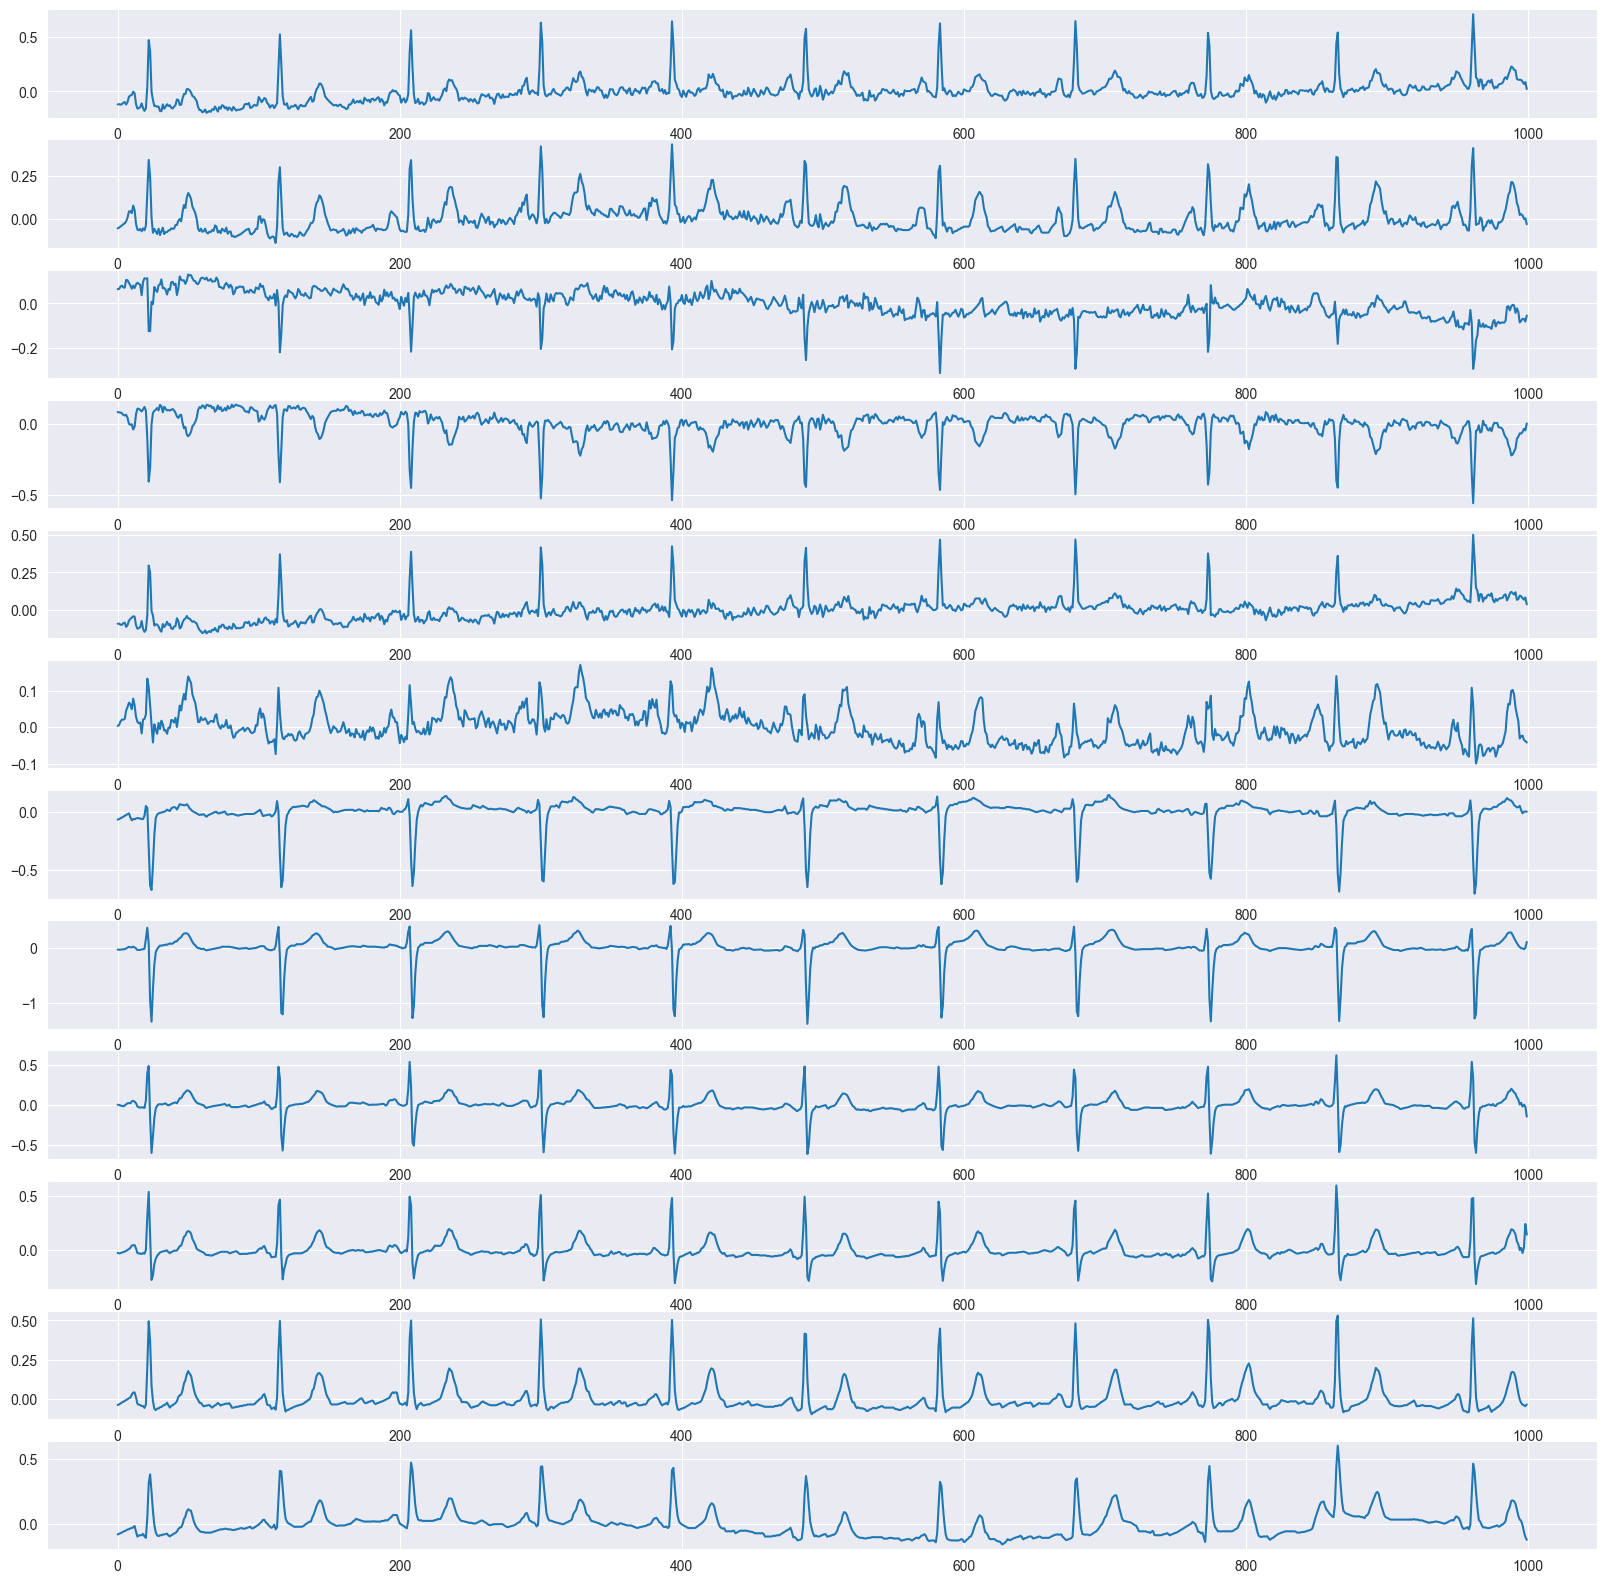

In [8]:
# understanding the signal data

sns.set_style("darkgrid")

sample = ecg_signal[0]
sample.shape
fix, axes = plt.subplots(sample.shape[1], 1, figsize=(20,20))
for i in range(sample.shape[1]):
    sns.lineplot(x=np.arange(sample.shape[0]), y=sample[:, i], ax=axes[i])
plt.show()

In [9]:
# number of different values
ecg_data[[col for col in ecg_data.columns if col not in ('scp_codes', 'scp_classes')]].nunique(dropna=True)

patient_id                      18885
age                                94
sex                                 2
height                             77
weight                            127
nurse                              12
site                               51
device                             11
recording_date                  21813
report                           9883
heart_axis                          8
infarction_stadium1                 6
infarction_stadium2                 3
validated_by                       12
second_opinion                      2
initial_autogenerated_report        2
validated_by_human                  2
baseline_drift                    321
static_noise                      124
burst_noise                       103
electrodes_problems                14
extra_beats                       128
pacemaker                           4
strat_fold                         10
filename_lr                     21837
filename_hr                     21837
dtype: int64

In [10]:
# number of null values
ecg_data.isnull().sum()

patient_id                          0
age                                89
sex                                 0
height                          14854
weight                          12408
nurse                            1509
site                               18
device                              0
recording_date                      0
report                              0
scp_codes                           0
heart_axis                       8505
infarction_stadium1             16211
infarction_stadium2             21734
validated_by                     9411
second_opinion                      0
initial_autogenerated_report        0
validated_by_human                  0
baseline_drift                  20230
static_noise                    18575
burst_noise                     21224
electrodes_problems             21807
extra_beats                     19883
pacemaker                       21544
strat_fold                          0
filename_lr                         0
filename_hr 

In [11]:
ecg_data

,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,...,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr,scp_classes
ecg_id,,,,,,,,,,,,,,,,,,,,,
1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,sinusrhythmus periphere niederspannung,...,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr,[NORM]
2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,sinusbradykardie sonst normales ekg,...,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr,[NORM]
3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,sinusrhythmus normales ekg,...,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr,[NORM]
4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,sinusrhythmus normales ekg,...,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr,[NORM]
5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,sinusrhythmus normales ekg,...,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr,[NORM]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21833,17180.0,67.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-05-31 09:14:35,ventrikulÄre extrasystole(n) sinustachykardie ...,...,NaN,", alles,",NaN,NaN,1ES,NaN,7,records100/21000/21833_lr,records500/21000/21833_hr,[STTC]
21834,20703.0,93.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-06-05 11:33:39,sinusrhythmus lagetyp normal qrs(t) abnorm ...,...,NaN,NaN,NaN,NaN,NaN,NaN,4,records100/21000/21834_lr,records500/21000/21834_hr,[NORM]
21835,19311.0,59.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-06-08 10:30:27,sinusrhythmus lagetyp normal t abnorm in anter...,...,NaN,", I-AVR,",NaN,NaN,NaN,NaN,2,records100/21000/21835_lr,records500/21000/21835_hr,[STTC]


In [12]:
X = pd.DataFrame(index=ecg_data.index)

X['sex'] = ecg_data['sex']

X['height'] = ecg_data.groupby('sex')['height'].transform(lambda x: x.fillna(x.mean()))

X['weight'] = ecg_data.groupby('sex')['weight'].transform(lambda x: x.fillna(x.mean()))

X['infarction_stadium1'] = ecg_data['infarction_stadium1'].replace({
    'unknown': 0,
    'Stadium I': 1,
    'Stadium I-II': 2,
    'Stadium II': 3,
    'Stadium II-III': 4,
    'Stadium III': 5
}).fillna(0)

X['infarction_stadium2'] = ecg_data['infarction_stadium2'].replace({
    'unknown': 0,
    'Stadium I': 1,
    'Stadium II': 2,
    'Stadium III': 3
}).fillna(0)

# 0 represents unknown
X['heart_axis'] = ecg_data.heart_axis.replace({
    'LAD': 1,
    'ALAD': 2,
    'RAD': 3,
    'AXR': 4,
    'MID': 5,
    'ARAD': 6,
    'AXL': 7,
    'SAG': 8
}).fillna(0)

X['pacemaker'] = (ecg_data.pacemaker == 'ja, pacemaker').astype(float)

# X represents meta data
X

C:\Users\Perfect computers\AppData\Local\Temp\ipykernel_20660\328022503.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['infarction_stadium1'] = ecg_data['infarction_stadium1'].replace({
C:\Users\Perfect computers\AppData\Local\Temp\ipykernel_20660\328022503.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['infarction_stadium2'] = ecg_data['infarction_stadium2'].replace({
C:\Users\Perfect computers\AppData\Local\Temp\ipykernel_20660\328022503.py:26: FutureWarning: Downcasting behavior in `replace` is deprecated and wil

,sex,height,weight,infarction_stadium1,infarction_stadium2,heart_axis,pacemaker
ecg_id,,,,,,,
1,1,160.987860,63.000000,0.0,0.0,0.0,0.0
2,0,173.494364,70.000000,0.0,0.0,0.0,0.0
3,1,160.987860,69.000000,0.0,0.0,0.0,0.0
4,0,173.494364,82.000000,0.0,0.0,0.0,0.0
5,1,160.987860,70.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
21833,1,160.987860,64.556847,0.0,0.0,1.0,0.0
21834,0,173.494364,78.504823,4.0,0.0,5.0,0.0
21835,1,160.987860,64.556847,0.0,0.0,5.0,0.0


In [13]:
# Y variable for signal
Y = ecg_signal

In [14]:
Y

array([[[-1.190e-01, -5.500e-02,  6.400e-02, ..., -2.600e-02,
         -3.900e-02, -7.900e-02],
        [-1.160e-01, -5.100e-02,  6.500e-02, ..., -3.100e-02,
         -3.400e-02, -7.400e-02],
        [-1.200e-01, -4.400e-02,  7.600e-02, ..., -2.800e-02,
         -2.900e-02, -6.900e-02],
        ...,
        [ 6.900e-02,  0.000e+00, -6.900e-02, ...,  2.400e-02,
         -4.100e-02, -5.800e-02],
        [ 8.600e-02,  4.000e-03, -8.100e-02, ...,  2.420e-01,
         -4.600e-02, -9.800e-02],
        [ 2.200e-02, -3.100e-02, -5.400e-02, ...,  1.430e-01,
         -3.500e-02, -1.200e-01]],

       [[ 4.000e-03,  1.380e-01,  1.340e-01, ...,  1.920e-01,
          8.300e-02,  8.800e-02],
        [-2.000e-02,  1.160e-01,  1.360e-01, ...,  1.560e-01,
          5.700e-02,  6.300e-02],
        [-5.300e-02,  9.200e-02,  1.450e-01, ...,  1.070e-01,
          1.300e-02,  2.200e-02],
        ...,
        [ 1.210e-01,  3.980e-01,  2.770e-01, ..., -1.065e+00,
         -4.920e-01, -1.560e-01],
        [-3.

In [15]:
ecg_signal

array([[[-1.190e-01, -5.500e-02,  6.400e-02, ..., -2.600e-02,
         -3.900e-02, -7.900e-02],
        [-1.160e-01, -5.100e-02,  6.500e-02, ..., -3.100e-02,
         -3.400e-02, -7.400e-02],
        [-1.200e-01, -4.400e-02,  7.600e-02, ..., -2.800e-02,
         -2.900e-02, -6.900e-02],
        ...,
        [ 6.900e-02,  0.000e+00, -6.900e-02, ...,  2.400e-02,
         -4.100e-02, -5.800e-02],
        [ 8.600e-02,  4.000e-03, -8.100e-02, ...,  2.420e-01,
         -4.600e-02, -9.800e-02],
        [ 2.200e-02, -3.100e-02, -5.400e-02, ...,  1.430e-01,
         -3.500e-02, -1.200e-01]],

       [[ 4.000e-03,  1.380e-01,  1.340e-01, ...,  1.920e-01,
          8.300e-02,  8.800e-02],
        [-2.000e-02,  1.160e-01,  1.360e-01, ...,  1.560e-01,
          5.700e-02,  6.300e-02],
        [-5.300e-02,  9.200e-02,  1.450e-01, ...,  1.070e-01,
          1.300e-02,  2.200e-02],
        ...,
        [ 1.210e-01,  3.980e-01,  2.770e-01, ..., -1.065e+00,
         -4.920e-01, -1.560e-01],
        [-3.

In [16]:
Z = pd.DataFrame(0, index=ecg_data.index, columns=['NORM', 'MI', 'STTC', 'CD', 'HYP'], dtype='int')

for i in Z.index:
    for j in ecg_data.loc[i, 'scp_classes']:
        Z.loc[i, j] = 1
        
Z['NORM'] = Z['NORM'].fillna(0)

In [17]:
Z

,NORM,MI,STTC,CD,HYP
ecg_id,,,,,
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
5,1,0,0,0,0
...,...,...,...,...,...
21833,0,0,1,0,0
21834,1,0,0,0,0
21835,0,0,1,0,0


In [18]:
# Training data
X_train = X[ecg_data.strat_fold <= 8]
Y_train = ecg_signal[ecg_data[ecg_data.strat_fold <= 8].index - 1]
Z_train = Z[ecg_data.strat_fold <= 8]

In [19]:
# Cross Valuation Data
X_val = X[ecg_data.strat_fold == 9]
Y_val = ecg_signal[ecg_data[ecg_data.strat_fold == 9].index - 1]
Z_val = Z[ecg_data.strat_fold == 9]

In [20]:
# Test data
X_test = X[ecg_data.strat_fold == 10]
Y_test = ecg_signal[ecg_data[ecg_data.strat_fold == 10].index - 1]
Z_test = Z[ecg_data.strat_fold == 10]

In [21]:
# ensure shapes match
print(f'X_train: {X_train.shape} Y_train: {Y_train.shape} Z_train: {Z_train.shape}')
print(f'X_val: {X_val.shape} Y_val: {Y_val.shape} Z_val: {Z_val.shape}')
print(f'X_test: {X_test.shape} Y_test: {Y_test.shape} Z_test: {Z_test.shape}')

X_train: (17441, 7) Y_train: (17441, 1000, 12) Z_train: (17441, 5)
X_val: (2193, 7) Y_val: (2193, 1000, 12) Z_val: (2193, 5)
X_test: (2203, 7) Y_test: (2203, 1000, 12) Z_test: (2203, 5)


In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
# Scaling X
X_scaler = StandardScaler()
X_scaler.fit(X_train)

X_train_scaled = pd.DataFrame(X_scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
X_val_scaled = pd.DataFrame(X_scaler.transform(X_val), columns=X_val.columns, index=X_val.index)
X_test_scaled = pd.DataFrame(X_scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

In [24]:
# Scaling Y
Y_scaler = StandardScaler()
Y_scaler.fit(Y_train.reshape(-1, Y_train.shape[-1]))

Y_train_scaled = Y_scaler.transform(Y_train.reshape(-1, Y_train.shape[-1])).reshape(Y_train.shape)
Y_val_scaled = Y_scaler.transform(Y_val.reshape(-1, Y_val.shape[-1])).reshape(Y_val.shape)
Y_test_scaled = Y_scaler.transform(Y_test.reshape(-1, Y_test.shape[-1])).reshape(Y_test.shape)

In [25]:
X_train_scaled

,sex,height,weight,infarction_stadium1,infarction_stadium2,heart_axis,pacemaker
ecg_id,,,,,,,
1,1.044988,-0.815161,-0.762997,-0.320229,-0.066347,-0.979556,-0.115346
2,-0.956949,0.746306,-0.155879,-0.320229,-0.066347,-0.979556,-0.115346
3,1.044988,-0.815161,-0.242610,-0.320229,-0.066347,-0.979556,-0.115346
4,-0.956949,0.746306,0.884894,-0.320229,-0.066347,-0.979556,-0.115346
5,1.044988,-0.815161,-0.155879,-0.320229,-0.066347,-0.979556,-0.115346
...,...,...,...,...,...,...,...
21832,-0.956949,0.746306,0.581753,-0.320229,-0.066347,-0.537835,-0.115346
21833,1.044988,-0.815161,-0.627970,-0.320229,-0.066347,-0.537835,-0.115346
21834,-0.956949,0.746306,0.581753,2.777877,-0.066347,1.229048,-0.115346


In [26]:
Y_train_scaled

array([[[-7.03528036e-01, -3.25834014e-01,  3.68218369e-01, ...,
         -8.25981359e-02, -1.39793650e-01, -2.73257521e-01],
        [-6.85481717e-01, -3.01474998e-01,  3.74021769e-01, ...,
         -9.93567618e-02, -1.21492015e-01, -2.55420710e-01],
        [-7.09543476e-01, -2.58846719e-01,  4.37859165e-01, ...,
         -8.93015863e-02, -1.03190379e-01, -2.37583898e-01],
        ...,
        [ 4.27374661e-01,  9.10246099e-03, -4.03633789e-01, ...,
          8.49881226e-02, -1.47114304e-01, -1.98342911e-01],
        [ 5.29637138e-01,  3.34614773e-02, -4.73274585e-01, ...,
          8.15664210e-01, -1.65415939e-01, -3.41037407e-01],
        [ 1.44648986e-01, -1.79679916e-01, -3.16582794e-01, ...,
          4.83843418e-01, -1.25152342e-01, -4.19519379e-01]],

       [[ 3.63710685e-02,  8.49488525e-01,  7.74456347e-01, ...,
          6.48077951e-01,  3.06766252e-01,  3.22491997e-01],
        [-1.07999489e-01,  7.15513935e-01,  7.86063146e-01, ...,
          5.27415845e-01,  2.11597748e

In [27]:
import joblib
import os

In [28]:
joblib.dump(X_train_scaled, 'X_train_scaled.joblib')
joblib.dump(Y_train_scaled, 'Y_train_scaled.joblib')
joblib.dump(Z_train, 'Z_train.joblib')
joblib.dump(X_test_scaled, 'X_test_scaled.joblib')
joblib.dump(Y_test_scaled, 'Y_test_scaled.joblib')
joblib.dump(Z_test, 'Z_test.joblib')
joblib.dump(X_val_scaled, 'X_val_scaled.joblib')
joblib.dump(Y_val_scaled, 'Y_val_scaled.joblib')
joblib.dump(Z_val, 'Z_val.joblib')

['Z_val.joblib']

In [29]:
import tensorflow as tf
from keras.layers import Conv1D, MaxPooling1D, Dropout, Dense, Concatenate, GlobalAveragePooling1D, BatchNormalization, ReLU
import joblib
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

sns.set_style('darkgrid')

In [30]:
# loading the saved data
X_train_scaled = joblib.load('X_train_scaled.joblib')
Y_train_scaled = joblib.load('Y_train_scaled.joblib')
Z_train = joblib.load('Z_train.joblib')
X_val_scaled = joblib.load('X_val_scaled.joblib')
Y_val_scaled = joblib.load('Y_val_scaled.joblib')
Z_val = joblib.load('Z_val.joblib')
X_test_scaled = joblib.load('X_test_scaled.joblib')
Y_test_scaled = joblib.load('Y_test_scaled.joblib')
Z_test = joblib.load('Z_test.joblib')

In [31]:
# X model
X_input = tf.keras.layers.Input(X_train_scaled.shape[1:], name="X_input")
X = Dense(128, activation='relu', name="X_dense_1")(X_input)
X = Dropout(0.4, name="X_dropout_1")(X)
X = Dense(128, activation='relu', name="X_dense_2")(X)
X = Dropout(0.4, name="X_dropout_2")(X)
X = Dense(64, activation='relu', name="X_dense_3")(X)
X = Dropout(0.4, name="X_dropout_3")(X)
X = Dense(32, activation='relu', name="X_dense_4")(X)
outputX = Dense(Z_train.shape[-1], activation='sigmoid', name="X_dense_5")(X)

modelX = tf.keras.Model(inputs=X_input, outputs=outputX)

In [32]:
modelX.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['binary_accuracy', 'Precision', 'Recall']
)

modelX.fit(
    X_train_scaled, Z_train, epochs = 40, batch_size=32, validation_data=(X_val_scaled, Z_val)
)

Epoch 1/40
 79/546 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - Precision: 0.2410 - Recall: 0.1698 - binary_accuracy: 0.6409 - loss: 0.6392

KeyboardInterrupt: 

In [ ]:
# Y model
Y_input = tf.keras.layers.Input(Y_train_scaled.shape[1:], name="Y_input")

Y = Conv1D(32, 3, padding='same', name="Y_conv_1")(Y_input)
Y = BatchNormalization(name="Y_norm_1")(Y)
Y = ReLU(name="Y_relu_1")(Y)
Y = MaxPooling1D(2, name="Y_max_1")(Y)

Y = Conv1D(64, 3, padding='same', name="Y_conv_2")(Y)
Y = BatchNormalization(name="Y_norm_2")(Y)
Y = ReLU(name="Y_relu_2")(Y)
Y = MaxPooling1D(2, name="Y_max_2")(Y)

Y = Conv1D(128, 3, padding='same', name="Y_conv_3")(Y)
Y = BatchNormalization(name="Y_norm_3")(Y)
Y = ReLU(name="Y_relu_3")(Y)

Y = GlobalAveragePooling1D(name="Y_global")(Y)

outputY = Dropout(0.4, name="Y_dropout")(Y)

In [ ]:
Z = Concatenate(name="Z_concat")([outputX, outputY])
Z = Dense(64, activation='relu', name="Z_dense_1")(Z)
Z = Dropout(0.4, name="Z_dropout_1")(Z)
Z = Dense(64, activation='relu', name="Z_dense_2")(Z)
Z = Dropout(0.4, name="Z_dropout_2")(Z)
output = Dense(Z_train.shape[-1], activation="sigmoid", name="Z_dense_3")(Z)

modelZ = tf.keras.Model(inputs=[X_input, Y_input], outputs=output)

In [ ]:
modelZ.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['binary_accuracy', 'Precision', 'Recall']
)

modelZ.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ Y_input             │ (None, 1000, 12)  │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Y_conv_1 (Conv1D)   │ (None, 1000, 32)  │      1,184 │ Y_input[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Y_norm_1            │ (None, 1000, 32)  │        128 │ Y_conv_1[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Y_relu_1 (ReLU)     │ (None, 1000, 32)  │          0 │ Y_norm_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Y_max_1             │ (None, 500, 32)   │          0 │ Y_relu_1[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ X_input             │ (None, 7)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Y_conv_2 (Conv1D)   │ (None, 500, 64)   │      6,208 │ Y_max_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ X_dense_1 (Dense)   │ (None, 128)       │      1,024 │ X_input[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Y_norm_2            │ (None, 500, 64)   │        256 │ Y_conv_2[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ X_dropout_1         │ (None, 128)       │          0 │ X_dense_1[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Y_relu_2 (ReLU)     │ (None, 500, 64)   │          0 │ Y_norm_2[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ X_dense_2 (Dense)   │ (None, 128)       │     16,512 │ X_dropout_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Y_max_2             │ (None, 250, 64)   │          0 │ Y_relu_2[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ X_dropout_2         │ (None, 128)       │          0 │ X_dense_2[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Y_conv_3 (Conv1D)   │ (None, 250, 128)  │     24,704 │ Y_max_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ X_dense_3 (Dense)   │ (None, 64)        │      8,256 │ X_dropout_2[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Y_norm_3            │ (None, 250, 128)  │        512 │ Y_conv_3[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ X_dropout_3         │ (None, 64)        │          0 │ X_dense_3[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Y_relu_3 (ReLU)     │ (None, 250, 128)  │          0 │ Y_norm_3[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ X_dense_4 (Dense)   │ (None, 32)        │      2,080 │ X_dropout_3[0][0

 Total params: 74,090 (289.41 KB)

 Trainable params: 73,642 (287.66 KB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
# displaying the model to better understand its process
tf.keras.utils.plot_model(modelZ, show_shapes=True)

NameError: name 'tf' is not defined

In [ ]:
callback = [
    tf.keras.callbacks.ModelCheckpoint(monitor='val_binary_accuracy', save_best_only=True, filepath='model.keras'),
    tf.keras.callbacks.EarlyStopping(monitor='val_binary_accuracy', restore_best_weights=True, patience=10, min_delta=0.001),
    tf.keras.callbacks.TensorBoard(log_dir='logs')
]

fitting = modelZ.fit(
    [X_train_scaled, Y_train_scaled], Z_train, epochs=100, batch_size=32, callbacks=callback, validation_data=([X_val_scaled, Y_val_scaled], Z_val)
)

NameError: name 'tf' is not defined

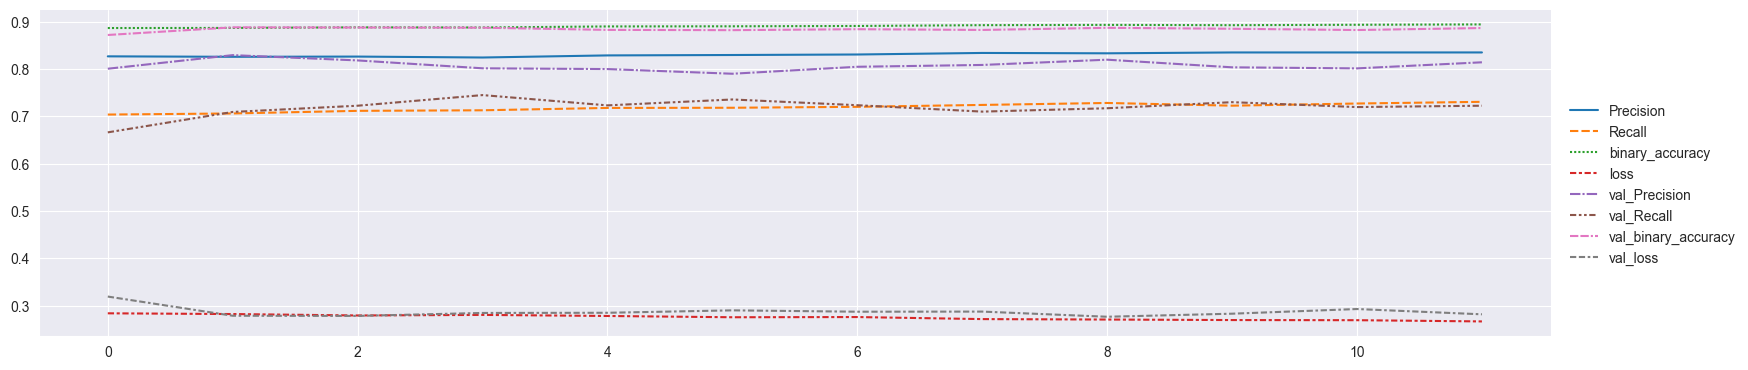

In [ ]:
sns.relplot(data=pd.DataFrame(fitting.history), kind='line', height=4, aspect=4)
plt.show()

In [ ]:
final_detection_model = tf.keras.models.load_model('model.keras')

In [ ]:
final_detection_model.evaluate([X_test_scaled, Y_test_scaled], Z_test)

69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - Precision: 0.8349 - Recall: 0.7137 - binary_accuracy: 0.8930 - loss: 0.2692


[0.2780514657497406,
 0.8301093578338623,
 0.7047483325004578,
 0.8882433176040649]

In [ ]:

# Predict the probabilities for the test data
probabilities = modelZ.predict([X_test_scaled, Y_test_scaled])

# Convert probabilities to class labels
class_labels = probabilities.argmax(axis=1)

# Print the class labels
print(class_labels)


69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
[0 0 0 ... 0 3 1]


In [ ]:
# replace class lables with the actual class names
class_names = ['NORM', 'MI', 'STTC', 'CD', 'HYP']
class_labels = [class_names[i] for i in class_labels]

# Print the class labels
print(class_labels)

['NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'STTC', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'CD', 'STTC', 'CD', 'NORM', 'CD', 'MI', 'CD', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'MI', 'NORM', 'NORM', 'STTC', 'NORM', 'MI', 'MI', 'HYP', 'STTC', 'NORM', 'STTC', 'STTC', 'NORM', 'NORM', 'NORM', 'NORM', 'STTC', 'STTC', 'NORM', 'STTC', 'NORM', 'NORM', 'STTC', 'MI', 'NORM', 'CD', 'STTC', 'STTC', 'NORM', 'NORM', 'NORM', 'STTC', 'NORM', 'CD', 'MI', 'HYP', 'STTC', 'STTC', 'STTC', 'NORM', 'STTC', 'CD', 'NORM', 'MI', 'MI', 'NORM', 'NORM', 'CD', 'NORM', 'CD', 'STTC', 'NORM', 'CD', 'NORM', 'CD', 'NORM', 'NORM', 'STTC', 'MI', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'STTC', 'NORM', 'NORM', 'CD', 'STTC', 'NORM', 'STTC', 'CD', 'MI', 'NORM', 'MI', 'NORM', 'NORM', 'STTC', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'MI', 'MI', 'NORM', 'CD', 'NORM', 'NORM', 'CD', 'STTC', 'STTC', 'CD', 'STTC', 'STTC', 'STTC', 'NORM', 'NO

In [ ]:
final_detection_model.evaluate([X_test_scaled, Y_test_scaled], Z_test)
# Predict the probabilities for the test data
probabilities = final_detection_model.predict([X_test_scaled, Y_test_scaled])
# also display the predicted lables that model predicted
class_labels = probabilities.argmax(axis=1)
# Print the class labels
print(class_labels)
# replace class lables with the actual class names
class_names = ['NORM', 'MI', 'STTC', 'CD', 'HYP']
class_labels = [class_names[i] for i in class_labels]
# Print the class labels
print(class_labels)



69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - Precision: 0.8349 - Recall: 0.7137 - binary_accuracy: 0.8930 - loss: 0.2692
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
[0 0 0 ... 0 3 1]
['NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'STTC', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'CD', 'STTC', 'CD', 'NORM', 'CD', 'MI', 'CD', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'MI', 'NORM', 'NORM', 'STTC', 'NORM', 'MI', 'MI', 'HYP', 'STTC', 'NORM', 'STTC', 'STTC', 'NORM', 'NORM', 'NORM', 'NORM', 'STTC', 'STTC', 'NORM', 'STTC', 'NORM', 'NORM', 'STTC', 'MI', 'NORM', 'CD', 'STTC', 'STTC', 'NORM', 'NORM', 'NORM', 'STTC', 'NORM', 'CD', 'MI', 'HYP', 'STTC', 'STTC', 'STTC', 'NORM', 'STTC', 'CD', 'NORM', 'MI', 'MI', 'NORM', 'NORM', 'CD', 'NORM', 'CD', 'STTC', 'NORM', 'CD', 'NORM', 'CD', 'NORM', 'NORM', 'STTC', 'MI', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'NORM', 'STTC', 'NORM', 'NORM', 'CD', 'STTC', 'NORM', 'STTC', 'CD', 'MI', 'NORM',

In [ ]:
import wfdb
import pandas as pd

# Specify the path to your ECG data
hea_file = 'D:\\Semester 7\\FYP\\PTB-xl_data\\records100\\00000\\00021_lr' 

# Load the ECG signal and header using wfdb
record = wfdb.rdrecord(hea_file)

# Extract the signal data (let's assume the first signal/channel is the ECG)
ecg_signal = record.p_signal[:,0] 

# Create a Pandas DataFrame
df = pd.DataFrame({'ecg_signal': ecg_signal})

# Save the DataFrame to a CSV file
df.to_csv('new_data.csv', index=False) 